In [1]:
import numpy as np 
import pandas as pd 
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
def open_im(image_path):
    im = Image.open(image_path).convert('RGB')
    im = np.array(im)
    return im

In [3]:
x_path = "train_x/"
y_path = "train_y/"

x_images = sorted([x_path+im for im in os.listdir(x_path)])
y_images = sorted([y_path+im for im in os.listdir(y_path)])

In [4]:
print(open_im(x_images[0]).shape)

(256, 256, 3)


(66000, 3)


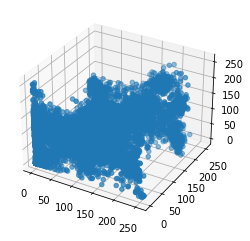

In [5]:
im_size = 256*256
pixel_list = np.vstack([open_im(im).reshape(im_size, 3) for im in y_images])
pixel_list = pixel_list[np.random.randint(pixel_list.shape[0], size=66000)]

print(pixel_list.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(pixel_list[:, 0], pixel_list[:, 1], pixel_list[:, 2])

In [ ]:
x = []
silhouettes = []
for clusters in range(2, 21):
    clusterer = KMeans(n_clusters=clusters)
    x.append(clusters)
    silhouettes.append(silhouette_score(pixel_list, clusterer.fit_predict(pixel_list)))
    print(f"Finished {clusters} Clusters")
plt.scatter(x, silhouettes)
plt.show()

12


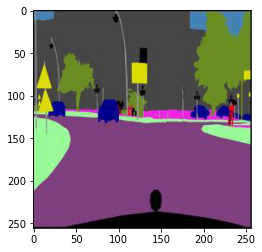

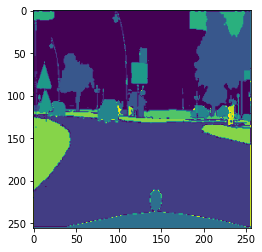

In [8]:
n_clusters = 12 #x[np.argmax(silhouettes)]
print(n_clusters)
color_map = {}
for color in range(n_clusters):
    color_map[color] = np.random.choice(range(256), size=3)

pixel_list = np.vstack([open_im(im).reshape(im_size, 3) for im in y_images])
pixel_list = pixel_list[np.random.randint(pixel_list.shape[0], size=66000*30)]

clusterer = KMeans(n_clusters=n_clusters)
clusterer.fit(pixel_list)

def cluster_y_image(im):
    im_size = 256*256
    im_pixels = open_im(im).reshape(im_size, 3)
    labels = clusterer.predict(im_pixels).reshape(256, 256, 1)
    #recolored = np.array([color_map[label] for label in labels]).reshape(256, 256, 3)
    return labels

def onehot_encode_y_im(im, num_clusters=12):
    im_size = 256*256
    im_pixels = open_im(im).reshape(im_size, 3)
    labels = clusterer.predict(im_pixels).reshape(-1, 1)
    encoder = OneHotEncoder(sparse=False)
    labels = encoder.fit_transform(labels)
    return labels.reshape(1, num_clusters, 256, 256)

plt.imshow(open_im(y_images[0]))
plt.show()
plt.imshow(cluster_y_image(y_images[0]))
plt.show()